In [57]:
import numpy as np
import sympy as sy
import scipy as sp
import matplotlib.pyplot as plt
from IPython.display import display, Math

In [58]:
row_vec = np.array([4, 2])
col_vec = np.array([[-2], [3]])

print(row_vec)
print(col_vec)

[4 2]
[[-2]
 [ 3]]


In [59]:
display(Math(sy.latex(sy.sympify(row_vec))))
display(Math(sy.latex(sy.sympify(col_vec))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


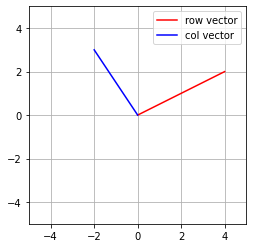

In [60]:
plt.plot([0, row_vec[0]], [0, row_vec[1]], 'r', label='row vector')
plt.plot([0, col_vec[0]], [0, col_vec[1]], 'b', label='col vector')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()

# Exercise

[3 0 -4]<br>
[-1 1 3]

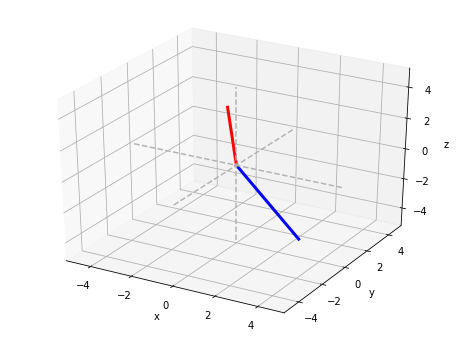

In [61]:

fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')

arr1 = np.array([3, 0, -4])
arr2 = np.array([-1, 1, 3])

ax.plot([0, arr1[0]], [0, arr1[1]], [0, arr1[2]], 'b', linewidth=3)
ax.plot([0, arr2[0]], [0, arr2[1]], [0, arr2[2]], 'r', linewidth=3)

ax.plot([-5, 5], [0, 0], [0, 0], '--', color=[.7, .7, .7])
ax.plot([0, 0], [-5, 5], [0, 0], '--', color=[.7, .7, .7])
ax.plot([0, 0], [0, 0], [-5, 5], '--', color=[.7, .7, .7])

ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

plt.show()

# Vector addition and subtraction: Algebra

$
\begin{pmatrix}
1 \\
0 \\
4 \\
3
\end{pmatrix} +
\begin{pmatrix}
2 \\
-3 \\
-2 \\
1
\end{pmatrix} =
\begin{pmatrix}
3 \\
-3 \\
2 \\
4
\end{pmatrix}$

# Vector-scalar multiplication: Algebra

$\lambda v \rightarrow 7
\begin{pmatrix}
-1 \\
0 \\
1
\end{pmatrix} = 
\begin{pmatrix}
-7 \\
0 \\
7
\end{pmatrix}$

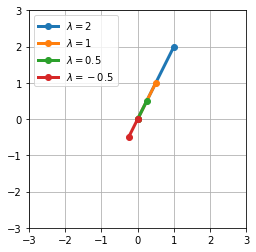

In [62]:
v = np.array([.5, 1])
s = [2, 1, .5, -.5]

for si in s:
  sv = si*v
  plt.plot([0, sv[0]], [0, sv[1]], 'o-', linewidth=3, label='$\\lambda=%g$' % si)

plt.legend()
plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.grid()
plt.show()

In [63]:
v1 = np.array([-1, 2])
v2 = np.array([1, 1])

v3a = v1+v2
v3b = np.add(v1, v2)
v3c = np.zeros(2)

for i in range(0, 2):
  v3c[i] = v1[i] + v2[i]

print(v3a, v3b, v3c)

[0 3] [0 3] [0. 3.]


# Exercise 

Confirm that the geometric and algebraic interpretations converge.

<IPython.core.display.Math object>

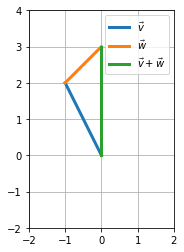

In [64]:
v = np.array([-1, 2])
w = np.array([1, 1])
vw = v+w

plt.plot([0, v[0]], [0, v[1]], linewidth=3, label='$\\vec{v}$')
plt.plot([0, w[0]]+v[0], [0, w[1]]+v[1], linewidth=3, label="$\\vec{w}$")
plt.plot([0, vw[0]], [0, vw[1]], linewidth=3, label="$\\vec{v} + \\vec{w}$")

sv = sy.sympify(v)
sw = sy.sympify(w)
svw = sy.sympify(vw)

display(Math("%s + %s = %s" % (sy.latex(sv), sy.latex(sw), sy.latex(svw))))

plt.axis('square')
plt.axis([-2, 2, -2, 4])
plt.legend()
plt.grid()
plt.show()

# Notations for and definition of the dot product

$\alpha = a \cdot b = \left<a, b\right> = a^T b = \sum_{i=1}^{n} a_i b_i$

In [65]:
v = np.arange(10, 20, 3)
w = np.arange(5, 15, 3)
print(v)
print(w)

dp1 = 0
for i in range(0, len(v)):
  dp1 += v[i]*w[i]

dp2 = np.sum(np.multiply(v, w))

dp3 = np.dot(v, w)

print(dp1)
print(dp2)
print(dp3)

[10 13 16 19]
[ 5  8 11 14]
596
596
596


# Exercise

Write a function that:



* Takes two vectors;
* Tests whether the dot product is valid between them;
* Returns the dot product or gives an error message.



In [66]:
def dot_product(v: np.array, w: np.array):
  v = np.squeeze(v)
  w = np.squeeze(w)
  assert v.shape == w.shape, "The two vectors must have the same shape, but was: %s and %s" % (v.shape, w.shape)
  result = np.dot(v, w)
  display(Math("v^T w = %g" % result))
  return result

In [69]:
# Testing assertion
try:
  dot_product(np.array([1]), np.array([1, 2]))
except Exception as error:
  print(f"{error}")

The two vectors must have the same shape, but was: () and (2,)


In [70]:
v = np.array([5, 10, 15])
w = np.array([1, 2, 3])
np.dot(v, w) == dot_product(v, w)

<IPython.core.display.Math object>

True

In [71]:
v1 = np.random.rand(1, 10)
v2 = np.random.rand(1, 10)

print(v1.shape, v2.shape)

v1 = np.squeeze(v1)
v2 = np.squeeze(v2)

print(v1.shape, v2.shape, "\n")

_ = dot_product(v1, v2)

(1, 10) (1, 10)
(10,) (10,) 



<IPython.core.display.Math object>

# Dot product application: Correlation coefficient

Correlation coefficient formula:

$r_{xy} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}}$

$\bar{x} = \text{mean of } x \\
\bar{y} = \text{mean of } y \\
r = \text{correlation coefficient}$

r = 0.605302
r = 0.605302
r = 0.605302
All correlations calc is valid: True

Line inclination, m = 0.66129
Line interception, b = 2.13978


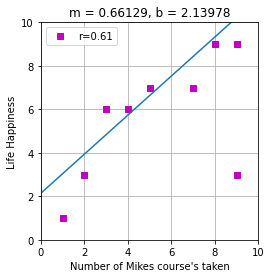

In [72]:
# data
mikes_courses = [4, 5, 8, 2, 9, 9, 1, 3, 7]
life_happiness = [6, 7, 9, 3, 9, 3, 1, 6, 7]

# mean-center
xmean = np.mean(mikes_courses)
ymean = np.mean(life_happiness)

xs = mikes_courses - xmean
ys = life_happiness - ymean

# compute correlation
numerator = np.dot(xs, ys)
denominator = np.sqrt(np.sum(xs**2))*np.sqrt(np.sum(ys**2))
r1 = numerator/denominator
print("r = %g" % r1)

numerator = np.dot(xs, ys)
denominator = np.sqrt(np.dot(xs, xs)) * np.sqrt(np.dot(ys, ys))
r2 = numerator/denominator
print("r = %g" % r2)

r3 = np.corrcoef(xs, ys)
print("r = %g" % r2)

print("All correlations calc is valid: %s\n" % (r1 == r2 == r3[0][1]))

sx = np.std(mikes_courses)
sy = np.std(life_happiness)
m = r1*(sx/sy)
print("Line inclination, m = %g" % m)

b = ymean - m*xmean
print("Line interception, b = %g" % b)

plt.plot(mikes_courses, life_happiness, 'ms', label='r=%g' % np.round(r1, 2))
plt.plot([0, b + m*10], [b, 10], '-', label="")

plt.title("m = %g, b = %g" % (m, b))
plt.xlabel("Number of Mikes course's taken")
plt.ylabel("Life Happiness")
plt.gca().set_aspect('equal')

plt.axis([0, 10, 0, 10])
plt.legend()
plt.grid()
plt.show()

y = 0 + 1x


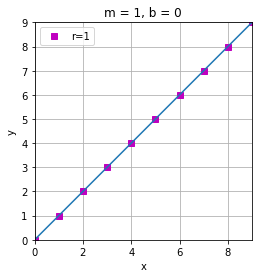

In [73]:
def plot_least_square_line(X: np.array, y: np.array, x_label="x", y_label="y"):
  # mean-center
  xmean = np.mean(X)
  ymean = np.mean(y)

  xs = X - xmean
  ys = y - ymean

  # compute correlation
  numerator = np.dot(xs, ys)
  denominator = np.sqrt(np.dot(xs, xs))*np.sqrt(np.dot(ys, ys))
  r = numerator/denominator

  sx = np.std(X)
  sy = np.std(y)
  m = r*(sy/sx)
  b = ymean - m*xmean

  ymax = np.max([np.max(X), np.max(y)])

  plt.plot(X, y, 'ms', label='r=%g' % np.round(r, 2))
  print("y = %g + %gx" % (b, m))
  plt.plot([0, b + m*ymax], [b, ymax], '-', label="")

  plt.title("m = %g, b = %g" % (np.round(m, 2), np.round(b, 2)))
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.gca().set_aspect('equal')

  plt.axis([0, ymax, 0, ymax])
  plt.legend()
  plt.grid()
  plt.show()

X = np.arange(10)
y = np.arange(10)
plot_least_square_line(X, y)

y = -4.45714 + 1.51429x


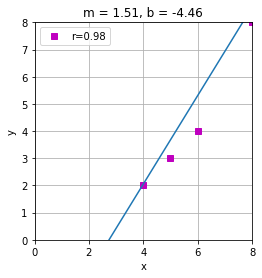

In [74]:
X = np.array([4, 5, 6, 8])
y = np.array([2, 3, 4, 8])
plot_least_square_line(X, y)

y = 1 + 1x


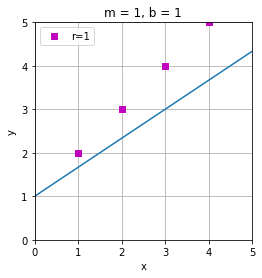

In [75]:
X = np.array([1, 2, 3, 4])
y = np.array([2, 3, 4, 5])
plot_least_square_line(X, y)

y = 1 + 1x


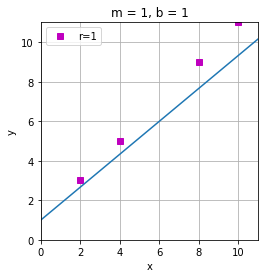

In [76]:
X = np.array([2, 4, 8, 10])
y = np.array([3, 5, 9, 11])
plot_least_square_line(X, y)

# Outer product

$
\begin{pmatrix}
1 \\
0 \\
2 \\
5
\end{pmatrix}
\begin{pmatrix}
a & b & c & d
\end{pmatrix} =
\begin{pmatrix}
1a & 1b & 1c & 1d \\
0a & 0b & 0c & 0d \\
2a & 2b & 2c & 2d \\
5a & 5b & 5c & 5d
\end{pmatrix}
$

In [77]:
v1 = np.random.randn(10)
v2 = np.random.randn(9)

out_prod = np.outer(v1, v2)
print(out_prod.shape)

(10, 9)


# Exercise

Test whether the outer product is matrix commutative and scalar-multplication-commutative

$a \times b = b \times a$

Matrix commutative:

$v \otimes w = w \otimes v$

scalar-multplication-commutative:

$cvw^T = vcw^T = vw^Tc$

In [78]:
v = np.arange(1, 11)
w = np.arange(1, 6)

print(np.outer(v, w))
print(np.outer(w, v))

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]
 [ 6 12 18 24 30]
 [ 7 14 21 28 35]
 [ 8 16 24 32 40]
 [ 9 18 27 36 45]
 [10 20 30 40 50]]
[[ 1  2  3  4  5  6  7  8  9 10]
 [ 2  4  6  8 10 12 14 16 18 20]
 [ 3  6  9 12 15 18 21 24 27 30]
 [ 4  8 12 16 20 24 28 32 36 40]
 [ 5 10 15 20 25 30 35 40 45 50]]


In [79]:
c = 3

op1 = c*np.outer(v, w)
op2 = np.outer(v, c*w)
op3 = np.outer(v, w)*c
op4 = np.outer(v*c, w)
print(op1)
print(op2)
print(op3)
print(op4)

np.all(op1 == op2) and np.all(op2 == op3) and np.all(op1 == op3) and np.all(op3 == op4)

[[  3   6   9  12  15]
 [  6  12  18  24  30]
 [  9  18  27  36  45]
 [ 12  24  36  48  60]
 [ 15  30  45  60  75]
 [ 18  36  54  72  90]
 [ 21  42  63  84 105]
 [ 24  48  72  96 120]
 [ 27  54  81 108 135]
 [ 30  60  90 120 150]]
[[  3   6   9  12  15]
 [  6  12  18  24  30]
 [  9  18  27  36  45]
 [ 12  24  36  48  60]
 [ 15  30  45  60  75]
 [ 18  36  54  72  90]
 [ 21  42  63  84 105]
 [ 24  48  72  96 120]
 [ 27  54  81 108 135]
 [ 30  60  90 120 150]]
[[  3   6   9  12  15]
 [  6  12  18  24  30]
 [  9  18  27  36  45]
 [ 12  24  36  48  60]
 [ 15  30  45  60  75]
 [ 18  36  54  72  90]
 [ 21  42  63  84 105]
 [ 24  48  72  96 120]
 [ 27  54  81 108 135]
 [ 30  60  90 120 150]]
[[  3   6   9  12  15]
 [  6  12  18  24  30]
 [  9  18  27  36  45]
 [ 12  24  36  48  60]
 [ 15  30  45  60  75]
 [ 18  36  54  72  90]
 [ 21  42  63  84 105]
 [ 24  48  72  96 120]
 [ 27  54  81 108 135]
 [ 30  60  90 120 150]]


True

# Matrix multiplication: The rules for validity

A   B

5x2 2x7 = 5x7 (VALID)

B   A

2x7 5x2 (INVALID)

C   A

5x7 5x2 (INVALID)



In [80]:
A = np.random.randn(14, 10)
B = np.random.randn(14, 10)
C = np.random.randn(10, 14)

print(f"VALID: A@C {(A@C).shape}")
print(f"VALID: B@C {(B@C).shape}")
print(f"VALID: C@A {(C@A).shape}")
print(f"VALID: C@B {(C@B).shape}")

try:
  print(A@B)
except Exception as error:
  print("INVALID: A@B")

VALID: A@C (14, 14)
VALID: B@C (14, 14)
VALID: C@A (10, 10)
VALID: C@B (10, 10)
INVALID: A@B


# Exercise

Write a function that takes two matrices as input, checks whether multiplication is valid, and returns their product or an error message

Note: Implement matrix multiplication via dot products of rows and columns; don't use the @ operator nor the function matmul!

In [81]:
def matrix_multiplication(A: np.array, B: np.array):
  assert A.shape[1] == B.shape[0], "The inner dimensions don't match. Shapes: %s and %s" % (A.shape, B.shape)
  N = np.zeros((A.shape[0], B.shape[1]))
  for li in range(A.shape[0]):
    for col in range(B.shape[1]):
      N[li, col] = np.dot(A[li,:], B[:,col])
  return N

print("Validate assert of inner dimension:")
try:
  matrix_multiplication(np.random.randn(5, 15), np.random.randn(8, 13))
except Exception as error:
  print(f"The assertion is working! Message: {error}")

A = np.random.randn(5, 7)
B = np.random.randn(7, 5)
N = matrix_multiplication(A, B)

print("\nN == A@B:")
print(np.all(np.round(N, 8) == np.round(A@B, 8)))

print("\nResult of matrix_multiplication:")
print(N)

print("\nResult of A@B:")
print(A@B)

print("\nResult of matmul(A, B):")
print(np.matmul(A, B))

Validate assert of inner dimension:
The assertion is working! Message: The inner dimensions don't match. Shapes: (5, 15) and (8, 13)

N == A@B:
True

Result of matrix_multiplication:
[[ 2.63633776 -5.50576232  2.57181879  3.01631238  1.05630755]
 [ 2.64582949 -2.85317738  0.43821989 -2.93182871 -0.56734603]
 [ 2.30523145 -3.7986655   1.63168075 -1.0666768  -0.06712885]
 [-0.58584278  3.23058429 -0.83549099  0.80465304  2.36960244]
 [-0.80248821  0.93940899  0.4965185  -1.50945115  1.03047977]]

Result of A@B:
[[ 2.63633776 -5.50576232  2.57181879  3.01631238  1.05630755]
 [ 2.64582949 -2.85317738  0.43821989 -2.93182871 -0.56734603]
 [ 2.30523145 -3.7986655   1.63168075 -1.0666768  -0.06712885]
 [-0.58584278  3.23058429 -0.83549099  0.80465304  2.36960244]
 [-0.80248821  0.93940899  0.4965185  -1.50945115  1.03047977]]

Result of matmul(A, B):
[[ 2.63633776 -5.50576232  2.57181879  3.01631238  1.05630755]
 [ 2.64582949 -2.85317738  0.43821989 -2.93182871 -0.56734603]
 [ 2.30523145 -3.7

# Transposing vectors and matrices

## Vector:

$
\begin{pmatrix}
1 \\
0 \\
2 \\
5 \\
-2
\end{pmatrix}^T =
\begin{pmatrix}
1 & 0 & 2 & 5 & -2
\end{pmatrix}
$

## Matrix:

$
\begin{pmatrix}
1  & 5 \\
0  & 6 \\
2  & 8 \\
5  & 3 \\
-2 & 0
\end{pmatrix}^T =
\begin{pmatrix}
1 & 0 & 2 & 5 & -2 \\
5 & 6 & 8 & 3 & 0
\end{pmatrix}
$

$
\begin{pmatrix}
1 & 0 & 2 & 5 & -2 \\
5 & 6 & 8 & 3 & 0
\end{pmatrix}^T =
\begin{pmatrix}
1  & 5 \\
0  & 6 \\
2  & 8 \\
5  & 3 \\
-2 & 0
\end{pmatrix}
$

$A^{TT} = A$

In [82]:
r = np.random.randn(1, 10)

rt1 = np.transpose(r)
rt2 = r.T

print(np.shape(r))
print(np.shape(rt1))
print(np.shape(rt2))

(1, 10)
(10, 1)
(10, 1)


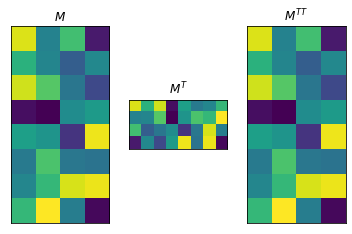

In [83]:
mat = np.random.rand(8, 4)
matT = mat.T
matTT = matT.T

fig, ax = plt.subplots(1, 3)

ax[0].imshow(mat)
ax[0].set_title("$M$")

ax[1].imshow(matT)
ax[1].set_title("$M^T$")

ax[2].imshow(matTT)
ax[2].set_title("$M^{TT}$")

for a in ax:
  a.set_xticks([])
  a.set_yticks([])

plt.show()

# Symmetric matrices

$
\begin{pmatrix}
1  & -1 & 0 \\
-1 & -2 & -4 \\
0  & -4 & 5
\end{pmatrix}
$

$
\begin{pmatrix}
1  & \color{Yellow}{-1} & \color{Cyan}{0} \\
\color{Yellow}{-1} & -2 & \color{DarkOrange}{-4} \\
\color{Cyan}{0}  & \color{DarkOrange}{-4} & 5
\end{pmatrix}
$

$\text{Symmetric: } A = A^T$

# Exercise

Show that a matrix (square and non-square!) times its transpose is square symmetric.

In [84]:
A = np.array([[1, -1, 0],
              [-1, -2, -4],
              [0, -4, 5]])

A_symmetric = A*A.T
print("A*A.T result is symmetric matrix:")
print(np.all(A_symmetric == A_symmetric.T))

B = np.random.randn(5, 7)
B_symmetric = np.matmul(B, B.T)
print("\nB@B.T result is symmetric matrix:")
print(np.all(B_symmetric == B_symmetric.T))

A*A.T result is symmetric matrix:
True

B@B.T result is symmetric matrix:
True


# Matrix zoo

## Identity matrix

$
\begin{pmatrix}
\color{Yellow}{1} & 0 & \cdots & 0 \\
0 & \color{Yellow}{1} & \cdots & 0 \\
\vdots &  & \ddots & \vdots \\
0 & 0 & \cdots & \color{Yellow}{1}
\end{pmatrix}
$

$I_2, I_5, I$

## Zero matrix

$
\begin{pmatrix}
0 & 0 & \cdots & 0 \\
0 & 0 & \cdots & 0 \\
\vdots &  & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{pmatrix}
$

$\textbf{0}$

## Diagonal matrix

Diagonal:

$
\begin{pmatrix}
\color{DarkOrange}{1} & 0 & 0 \\
0 & \color{DarkOrange}{-2} & 0 \\
0 & 0 & \color{DarkOrange}{5}
\end{pmatrix}
$

Also diagonal:

$
\begin{pmatrix}
\color{DarkOrange}{\pi} & 0 & 0 & 0 \\
0 & \color{DarkOrange}{0} & 0 & 0 \\
0 & 0 & \color{DarkOrange}{5} & 0
\end{pmatrix}
$

$\lambda I$

$
\begin{pmatrix}
\color{DarkOrange}{2} & 0 & 0 \\
0 & \color{DarkOrange}{2} & 0 \\
0 & 0 & \color{DarkOrange}{2}
\end{pmatrix} = 2I
$

$\color{Yellow}{Upper} \text{ triangular:}$

$
\begin{pmatrix}
\color{DarkOrange}{1} & \color{Yellow}{4} & \color{Yellow}{7} \\
0 & \color{DarkOrange}{-2} & \color{Yellow}{2} \\
0 & 0 & \color{DarkOrange}{5}
\end{pmatrix}
$

$\color{DarkBlue}{Lower} \text{ triangular:}$

$
\begin{pmatrix}
\color{DarkOrange}{1} & 0 & 0 & 0 \\
\color{DarkBlue}{3} & \color{DarkOrange}{-2} & 0 & 0 \\
\color{DarkBlue}{4} & \color{DarkBlue}{5} & \color{DarkOrange}{5} & 0 \\
\color{DarkBlue}{1} & \color{DarkBlue}{2} & \color{DarkBlue}{7} & \color{DarkOrange}{4}
\end{pmatrix}
$


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


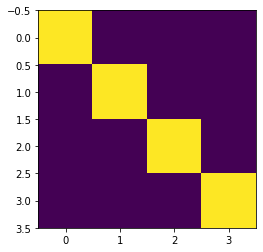

In [85]:
I = np.eye(4)
print(I)

plt.imshow(I)
plt.show()

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


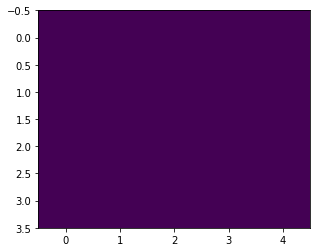

In [86]:
Z = np.zeros((4, 5))
print(Z)

plt.imshow(Z)
plt.show()

[[ 1  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 -5]]
[ 1  4  6  3 -5]


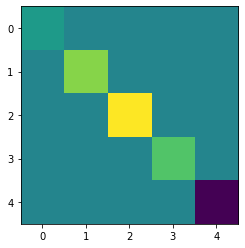

In [87]:
D = np.diag([1, 4, 6, 3, -5])
print(D)

d = np.diagonal(D)
print(d)

plt.imshow(D)
plt.show()

[[ 1  0  0  0  0]
 [ 0  4  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 -5]]


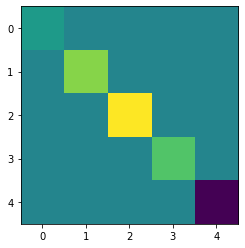

In [88]:
D = np.diag([1, 4, 6, 3, -5])
print(D)

plt.imshow(D)
plt.show()

[[13  7 13  6  1  6  0  6]
 [ 0 12  2  2  3  0  9 13]
 [ 0  0  6 10 10 13  0  9]
 [ 0  0  0  0  9 14  0  9]
 [ 0  0  0  0 14  1  5 11]
 [ 0  0  0  0  0  2  2  7]
 [ 0  0  0  0  0  0 13  5]
 [ 0  0  0  0  0  0  0  3]]


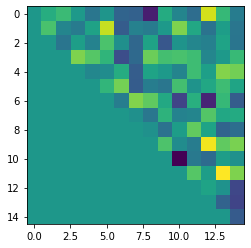

In [89]:
T = np.random.randint(0, 15, (8, 8))
print(np.triu(T))

plt.imshow(np.triu(np.random.randn(15, 15)))
plt.show()

[[ 6  5  3 10  9  5 14  9]
 [ 0  6  1 13  2 12 10 13]
 [ 0  0  1 10  3 14  7 12]
 [ 0  0  0  5 10  5 11  6]
 [ 0  0  0  0 10  1  6  5]
 [ 0  0  0  0  0  5  3 13]
 [ 0  0  0  0  0  0  2 13]
 [ 0  0  0  0  0  0  0  3]]


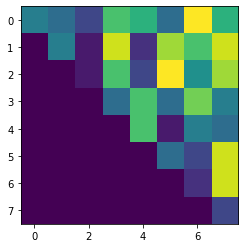

In [90]:
T = np.random.randint(0, 15, (8, 8))
triuT = np.triu(T)
print(triuT)

plt.imshow(triuT)
plt.show()

[[ 3  0  0  0  0  0  0  0]
 [ 7 13  0  0  0  0  0  0]
 [ 3  8 14  0  0  0  0  0]
 [12  4 11  1  0  0  0  0]
 [ 7  7  9  5  3  0  0  0]
 [11  3  5  7  3 11  0  0]
 [ 3  0 10 13  4  0 11  0]
 [ 5  9  7 11 10  3 14  9]]


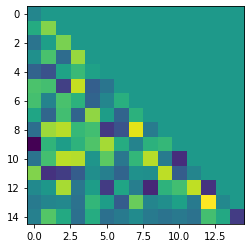

In [91]:
T = np.random.randint(0, 15, (8, 8))
print(np.tril(T))

plt.imshow(np.tril(np.random.randn(15, 15)))
plt.show()

[[ 8  0  0  0  0  0  0  0]
 [12 11  0  0  0  0  0  0]
 [ 9  4  3  0  0  0  0  0]
 [ 1  4  8  0  0  0  0  0]
 [ 8 10  9  4  9  0  0  0]
 [12  3 12  0  5  1  0  0]
 [11 13  0  6 14  3 12  0]
 [11 14 10  3  9  0 11  4]]


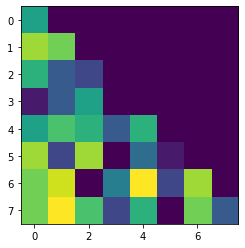

In [92]:
T = np.random.randint(0, 15, (8, 8))
trilT = np.tril(T)
print(trilT)

plt.imshow(trilT)
plt.show()

# Exercises

1) Create a 4x4 matrix of random integers between -4 and 4. Multiply this matrix by (1) the identity matrix and (2) by an upper-triangular random-numbers matrix.

2) Create a Toeplitz matrix and figure out how it is created.

In [93]:
A = np.random.randint(-4, 4+1, (4, 4))
I = np.eye(*A.shape)
R = np.triu(np.random.randn(4, 4))
A@I@R

array([[ 0.61764877, -0.04937674,  2.19200803, -2.02461526],
       [ 1.23529755,  3.89390152, -4.90811798, -3.10086769],
       [-0.92647316, -0.81319155, -0.74050676,  1.85842541],
       [ 0.61764877,  3.05602159, -8.10621306, -6.80487134]])

[[ 21.  27.  17.   2.   3.  28. -17.]
 [ 11.  21.  27.  17.   2.   3.  28.]
 [-23.  11.  21.  27.  17.   2.   3.]
 [-22. -23.  11.  21.  27.  17.   2.]
 [-30. -22. -23.  11.  21.  27.  17.]
 [  7. -30. -22. -23.  11.  21.  27.]
 [ -9.   7. -30. -22. -23.  11.  21.]]


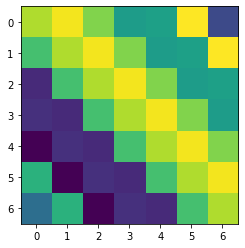

In [94]:
toeplitz = np.zeros((7, 7))

for li in range(toeplitz.shape[0]):
  for col in range(toeplitz.shape[1]):

    if li-1 < 0 or col-1 < 0:
      toeplitz[li, col] = np.random.randint(-30, 30+1)
    else:
      toeplitz[li, col] = toeplitz[li-1, col-1]

print(toeplitz)
plt.imshow(toeplitz)
plt.show()

[[1 2 3 4 5]
 [2 1 2 3 4]
 [3 2 1 2 3]
 [4 3 2 1 2]
 [5 4 3 2 1]]


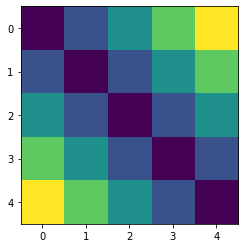

In [104]:
toe = sp.linalg.toeplitz(np.arange(1, 6))
print(toe)

plt.imshow(toe)
plt.show()

[[-1 -3  5 -3  1]
 [ 5  3 -5 -5  3]
 [-4  0  0 -1  1]
 [ 5 -4 -5  1  4]
 [ 3 -1  2 -5  3]]
[[-0.07291667 -0.03125    -0.18269231  0.00320513  0.11217949]
 [-0.65625    -0.28125     0.125      -0.125       0.625     ]
 [-0.39583333 -0.3125      0.01923077 -0.07051282  0.53205128]
 [-0.61458333 -0.40625     0.08653846  0.01602564  0.56089744]
 [-0.90625    -0.53125     0.35576923  0.02884615  1.00961538]]


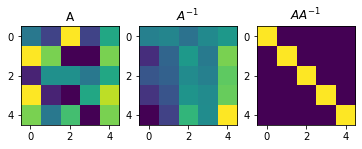

In [105]:
m = 5

A = np.random.randint(-5, 5+1, (m, m))
Ainv = np.linalg.inv(A)

print(A)
print(Ainv)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")

ax[1].imshow(Ainv)
ax[1].set_title("$A^{-1}$")

ax[2].imshow(A@Ainv)
ax[2].set_title("$AA^{-1}$")

plt.show()

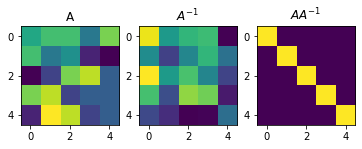

In [106]:
m = 5

A = np.random.randint(-m, m+1, (m, m))
Ainv = np.linalg.inv(A)

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")

ax[1].imshow(Ainv)
ax[1].set_title("$A^{-1}$")

ax[2].imshow(A@Ainv)
ax[2].set_title("$AA^{-1}$")

plt.show()

A matrix is invertible if it's:
1. Square
2. Full rank

Otherwise, use the pseudoinverse.

## Exercise

Compute the pseudoinverse and make images of A, A*, and AA* for:

1. A 5x5 matrix with random integers between -5 and +5, where the first column equals the second column.
2. A 5x7 matrix of Gaussian random numbers.


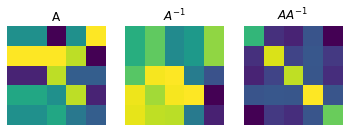

In [107]:
A = np.random.randint(-5, 5+1, (5, 5))
A[:,0] = A[:,1]
Apinv = np.linalg.pinv(A)
AApinv = A@Apinv

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")

ax[1].imshow(Apinv)
ax[1].set_title("$A^{-1}$")

ax[2].imshow(AApinv)
ax[2].set_title("$AA^{-1}$")

for a in ax:
  a.axis('off')

plt.show()

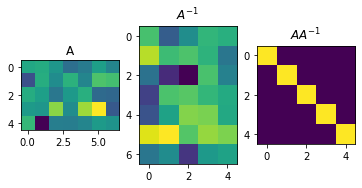

In [111]:
A = np.random.normal(size=(5, 7))
Apinv = np.linalg.pinv(A)
AApinv = A@Apinv

fig, ax = plt.subplots(1, 3)

ax[0].imshow(A)
ax[0].set_title("A")

ax[1].imshow(Apinv)
ax[1].set_title("$A^{-1}$")

ax[2].imshow(AApinv)
ax[2].set_title("$AA^{-1}$")

plt.show()

# A system of equations

$
\begin{matrix}
2x + y - z = 1 \\
3x + 4y + 2z = 13 \\
x - 5y - 2z = 0
\end{matrix} \Rightarrow
\begin{pmatrix}
2 & 1 & -1 \\
3 & 4 & 2 \\
1 & -5 & -2 \\
\end{pmatrix} 
\begin{pmatrix}
x \\
y \\
z
\end{pmatrix} =
\begin{pmatrix}
1 \\
13 \\
0
\end{pmatrix} \\
\Downarrow \\
X \beta = y \\
\text{Least-squares solution: } \\
\beta = (X^T X)^{-1}X^T y
$

In [112]:
X = np.array([[2, 1, -1], 
              [3, 4, 2], 
              [1, -5, -2]])
y = np.array([1, 13, 0])

beta1 = np.linalg.inv(X.T@X) @ (X.T@y)
print(beta1)

beta2 = np.linalg.solve(X, y)
print(beta2)

[ 3. -1.  4.]
[ 3. -1.  4.]


# Exercise

1. Implement these systems of equations as matrix-vector equations in Python.
2. Solve for x, y
3. Draw lines for each equation.

$
\text{System 1} \Rightarrow 
\left\{
  \begin{array}
    .3x_1 - y1 = 6 \\
    -x_1 + y_1 = 2
  \end{array}
\right.
$

$
\text{System 2} \Rightarrow 
\left\{
  \begin{array}
    1x_2 - y_2 = 6 \\
    1.5x_2 - .5y_2 = 3
  \end{array}
\right.
$

$
\text{System 3} \Rightarrow 
\left\{
  \begin{array}
    .3x_3 - y_3 = 6 \\
    1.5x_3 - 0.5y_3 = 2
  \end{array}
\right.
$

solution system 1: [4. 6.]
solution system 2: [ 2.96059473e-16 -6.00000000e+00]
solution system 3: [-1. -7.]


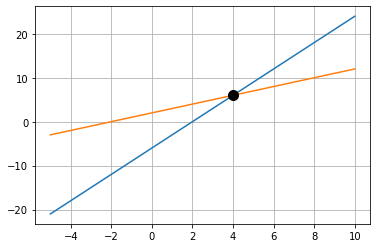

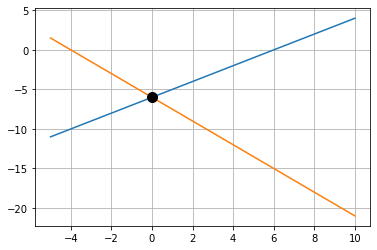

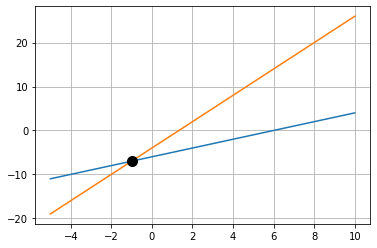

In [113]:
#1)

X1 = np.array([[3, -1],
               [-1, 1]])
y1 = np.array([6, 2])

X2 = np.array([[1, -1],
               [1.5, -.5]])
y2 = np.array([6, 3])

X3 = np.array([[1, -1],
               [1.5, -.5]])
y3 = np.array([6, 2])

#2)

solu1 = np.linalg.solve(X1, y1)
solu2 = np.linalg.solve(X2, y2)
solu3 = np.linalg.solve(X3, y3)

print(f"solution system 1: {solu1}")
print(f"solution system 2: {solu2}")
print(f"solution system 3: {solu3}")

#3)

xlim = np.array([-5, 10])
yy1 = -X1[0, 0]/X1[0, 1]*xlim + y1[0]/X1[0, 1]
yy2 = -X1[1, 0]/X1[1, 1]*xlim + y1[1]/X1[1, 1]

plt.plot(xlim, yy1, label="equation 1")
plt.plot(xlim, yy2, label="equation 2")
plt.plot(solu1[0], solu1[1], 'ko', markersize=10, label="solution")
plt.grid()
plt.show()

yy1 = -X2[0, 0]/X2[0, 1]*xlim + y2[0]/X2[0, 1]
yy2 = -X2[1, 0]/X1[1, 1]*xlim + y2[1]/X2[1, 1]

plt.plot(xlim, yy1, label="equation 1")
plt.plot(xlim, yy2, label="equation 2")
plt.plot(solu2[0], solu2[1], 'ko', markersize=10, label="solution")
plt.grid()
plt.show()

yy1 = -X3[0, 0]/X3[0, 1]*xlim + y3[0]/X3[0, 1]
yy2 = -X3[1, 0]/X3[1, 1]*xlim + y3[1]/X3[1, 1]

plt.plot(xlim, yy1, label="equation 1")
plt.plot(xlim, yy2, label="equation 2")
plt.plot(solu3[0], solu3[1], 'ko', markersize=10, label="solution")
plt.grid()
plt.show()

# Matrix-vector multiplication

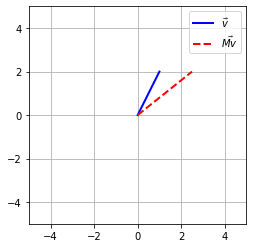

In [114]:
M = np.array([[.5, 1],
              [1, .5]])
v = np.array([1, 2])
Mv = M@v

plt.plot([0, v[0]], [0, v[1]], 'b', linewidth=2, label='$\\vec{v}$')
plt.plot([0, Mv[0]], [0, Mv[1]], 'r--', linewidth=2, label='$\\vec{Mv}$')

plt.axis('square')
plt.axis([-5, 5, -5, 5])
plt.grid()
plt.legend()
plt.show()

# Exercise

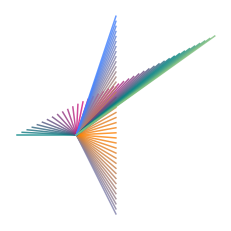

In [115]:
M = np.array([[.5, 1],
              [1, .5]])

for a in np.linspace(-2, 2+1, 40):
  v = np.array([1, a])
  Mv = M@v
  plt.plot([0, v[0]], [0, v[1]], color=[1-abs(a)/4, .5, abs(a)/3], alpha=.8)
  plt.plot([0, Mv[0]], [0, Mv[1]], color=[abs(1-abs(a)/2), abs(a)/4, .5], alpha=.8)

plt.axis('square')
plt.axis('off')
plt.show()

# Eigenvalues and eigenvectors

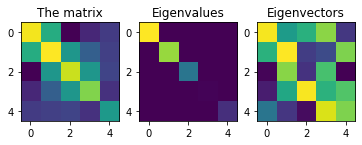

In [116]:
M = np.random.randint(-5, 5+1, (5, 5))
M = M@M.T

eigvals, eigvecs = np.linalg.eig(M)

fig, ax = plt.subplots(1, 3)
ax[0].imshow(M)
ax[0].set_title("The matrix")

ax[1].imshow(np.diag(eigvals))
ax[1].set_title("Eigenvalues")

ax[2].imshow(eigvecs)
ax[2].set_title("Eigenvectors")

plt.show()

In [117]:
Mv = M@eigvecs[:,0]
lv = eigvals[0]*eigvecs[:,0]
print(Mv)
print(lv)

[ 50.87666084  20.41990363 -34.15560886 -28.16285658  -1.2814131 ]
[ 50.87666084  20.41990363 -34.15560886 -28.16285658  -1.2814131 ]


# Exercise 1
1. Extract eigenvectors and eigenvalues from:
  $M = 
  \begin{pmatrix}
  1 & 2 \\
  2 & 1
  \end{pmatrix}
  $
2. Plot $\lambda v$ and $Mv$

# Exercise 2
1. Create a 6x6 symmetric random-numbers matrix.
2. Extract eigenvectors
3. Compute dot products between all pairs of eigenvectors and show as a matrix.

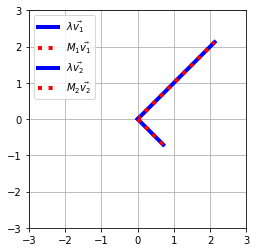

In [157]:
# Exercise 1

M = np.array([[1, 2],
              [2, 1]])
eigvals, eigvecs = np.linalg.eig(M)

lv = eigvals[0]*eigvecs[:,0]
Mv = M@eigvecs[:,0]

plt.plot([0, lv[0]], [0, lv[1]], 'b', linewidth=4, label='$\\lambda\\vec{v_1}$')
plt.plot([0, Mv[0]], [0, Mv[1]], 'r:', linewidth=4, label='$M_1\\vec{v_1}$')

lv = eigvals[1]*eigvecs[:,1]
Mv = M@eigvecs[:,1]

plt.plot([0, lv[0]], [0, lv[1]], 'b', linewidth=4, label='$\\lambda\\vec{v_2}$')
plt.plot([0, Mv[0]], [0, Mv[1]], 'r:', linewidth=4, label='$M_2\\vec{v_2}$')

plt.axis('square')
plt.axis([-3, 3, -3, 3])
plt.legend()
plt.grid()
plt.show()

[[ 1. -0. -0. -0.  0. -0.]
 [-0.  1.  0. -0.  0. -0.]
 [-0.  0.  1.  0. -0. -0.]
 [-0. -0.  0.  1.  0.  0.]
 [ 0.  0. -0.  0.  1. -0.]
 [-0. -0. -0.  0. -0.  1.]]


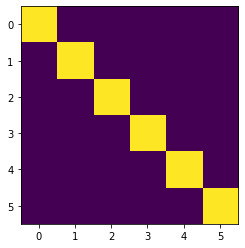

In [161]:
# Exercise 2

m = 6
Q = np.random.rand(m, m)
Q = Q@Q.T
eigvals, eigvecs = np.linalg.eig(Q)

dps = np.zeros((m, m))
for i in range(m):
  for j in range(m):
    dps[i, j] = np.dot(eigvecs[:,i], eigvecs[:,j])

print(np.round(dps, 5))
plt.imshow(dps)
plt.show()

# Singular value decomposition (SVD)

$A_{mxn} = U_{mxm}\Sigma_{mxn}V^T_{nxn}$

In [162]:
from PIL import Image

(405, 314, 3)


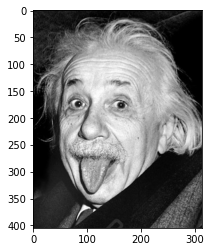

In [260]:
ein = Image.open('einstein.jpg')
print(np.shape(ein))

plt.imshow(ein)
plt.show()

(405, 314)


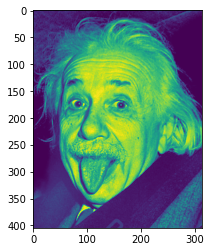

In [261]:
ein = np.mean(ein, 2)
print(np.shape(ein))

plt.imshow(ein)
plt.show()

(405, 314)
(314,)
(314, 314)


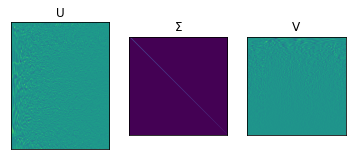

In [262]:
U, s, V = np.linalg.svd(ein, full_matrices=False)

print(np.shape(U))
print(np.shape(s))
print(np.shape(V))

fig, ax = plt.subplots(1, 3)

ax[0].set_title("U")
ax[0].imshow(U)

ax[1].set_title("$\\Sigma$")
ax[1].imshow(np.diag(np.log(s)))

ax[2].set_title("V")
ax[2].imshow(V)

for a in ax:
  a.set_xticks([])
  a.set_yticks([])

plt.show()

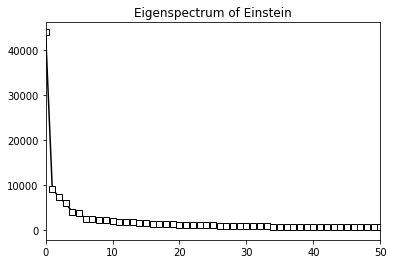

In [263]:
plt.plot(s, 'ks-', markerfacecolor='w')
plt.xlim([0, 50])
plt.title("Eigenspectrum of Einstein")
plt.show()

# Exercise 1
Reconstruct the image from the SVD.

# Exercise 2
Reconstruct Einstein but shuffle the singular values.

# Exercise 3
Partially reconstruct Einstein using the first N components

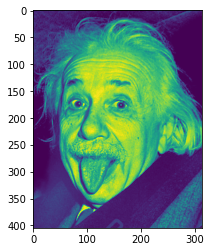

In [264]:
# Exercise 1

S = np.diag(s)
plt.imshow(U@S@V)
plt.show()

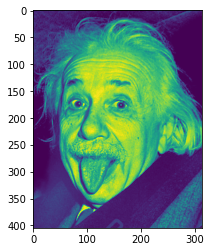

In [266]:
# Exercise 2

S = np.squeeze(s)
np.random.permutation(S)
S = np.diag(S)
plt.imshow(U@S@V)
plt.show()

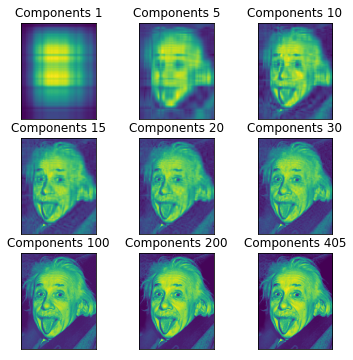

In [298]:
# Exercise 3

comps = [1, 5, 10, 
         15, 20, 30, 
         100, 200, 405]

fig, ax = plt.subplots(3, 3, figsize=(6, 6))
axl = np.ravel(ax)
for i in range(len(comps)):
  A = U[:,:comps[i]]@np.diag(s[:comps[i]])@V[:comps[i], :]
  axl[i].set_title(f"Components {comps[i]}")
  axl[i].imshow(A)
  axl[i].set_xticks([])
  axl[i].set_yticks([])
plt.show()

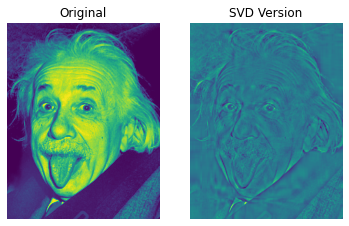

In [300]:
U, s, V = np.linalg.svd(ein)
randorder = np.random.permutation(len(s))

S = np.zeros(np.shape(ein))
for i in range(10, len(s)):
  S[i, i] = s[i]

rein = U@S@V

plt.subplot(1, 2, 1)
plt.imshow(ein)
plt.axis('off')
plt.title("Original")

plt.subplot(1, 2, 2)
plt.imshow(rein)
plt.axis('off')
plt.title("SVD Version")

plt.show()